### About dataset :
The dataset contains three columns 'id', 'label', 'tweet' the tweet column contains all the tweets on which we have to train the model 
'label' contains the sentiment of the tweet either negative (0) or  positive (1). 

In [2]:
import numpy as np
import pandas as pd
import re
import time 

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.externals import joblib 
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle # to shuffle the data 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import KFold, StratifiedKFold
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### importing the dataframe

In [2]:
data = pd.read_csv("train_tweet.csv")

### checking for null values in dataset 

In [3]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Shuffle the data to decrease the chance of overfitting 

In [4]:
dataset = shuffle(data)

### counting the number of positive and negative tweets in the dataset 

In [5]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
dataset.shape

(31962, 3)

In [7]:
dataset = dataset.reset_index(drop = True)  # resetting the index

In [8]:
dataset.head()

,id,label,tweet
0,6359,0,feliz tarde! #toptags days top.tags day #smi...
1,6760,0,my little boy had a gr8 day yesterday @user #a...
2,24053,0,agreed. no swimming does not mean #dangerlurk...
3,31127,0,"@user for us wnyers, he was a hero in those ea..."
4,30522,0,@user happy day! âð»ï¸ðªð»ð#cute ...


making one more column with sentiments of the tweets

In [10]:
from textblob import TextBlob
dataset['sentiment'] = dataset['tweet'].map(lambda text: TextBlob(text).sentiment.polarity)

In [11]:
dataset.head()

,id,label,tweet,sentiment
0,4828,0,25th wedding anniversary!!ððððð,0.00
1,11533,0,updated. #book #wattpad #poetry #verse #poem ...,0.30
2,19597,0,@user @user @user @user looks amazing. we sha...,0.30
3,27356,0,"rain, rain, rain in #birmingham..looks like @u...",0.00
4,14307,0,yo en pose!! #friday #pretty #alwaysme @ sto...,0.25


### printing top positive & negative tweets 

In [12]:
print("5 random tweets with highest positive sentiment polarity: \n")
cL = dataset.loc[dataset.sentiment==1, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest positive sentiment polarity: 

 @user   #stevefrancis was like one of the best from #umd to the #rockets and was a beast but it looks like the #pipe gâ¦ 

i am so blessed! my girls are perfect!   #mom  #mylife 

happy bihday biiiitch! ð   #bihday bihday bihdaytoyou #bff #bestfriendâ¦ 

when a person is losing the best thing that ever happened to them and they don't even realize it ð¯  

what a wonderful day!!! #greatday #wonderfulday #sun   #alc #alcar



In [13]:
print("5 random tweets with highest nagative sentiment polarity: \n")
cL = dataset.loc[dataset.sentiment==-1, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest nagative sentiment polarity: 

if talking about  makes racism worst, with that logic talking about how talking about racism makes it worst, makes it worst.

@user @user @user @user i know i was shocked!!!!   x

lefties hate uk &amp; everything about it, they prefer swarms of stinky boat people to us! 

ffs why?!!! omg can't believe this. so annoyed!!!!!! why would someone do this? ð¡ðð¢  #carproblems #fml #vandals   

#bihdaygirl champers and creed this morning then surprise time!   ðð¾ðªð¸ it's bloody roasting! ð¥âï¸ 



### Cleaning the dataset 

In [9]:
# Cleaning the texts
corpus = []
for i in range(0, 31962):
    tweet = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

### saving the corpus of shuffled data

In [10]:
#save the corpus(shuffled)
np.save('tweet_cleaned_corpus_shuffled.npy', corpus)

In [17]:
#save the corpus(unshuffled)
np.save('tweet_corpus.npy', corpus)

In [4]:
corpus.shape

(31962,)

In [3]:
#load corpus (shuffled)
corpus = np.load('tweet_cleaned_corpus_shuffled.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [20]:
# #load the corpus of unshuffled normal data
# corpus_ = np.load('tweet_cleaned_corpus.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

### making the wordclud model of whole tweets in dataset

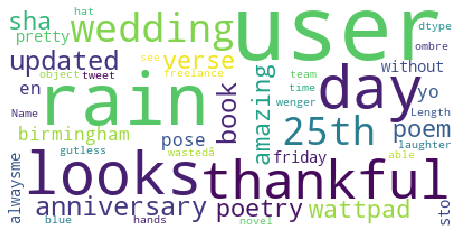

In [18]:
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(dataset['tweet']))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### making the wordcloud model of clean corpus of shuffled dataset

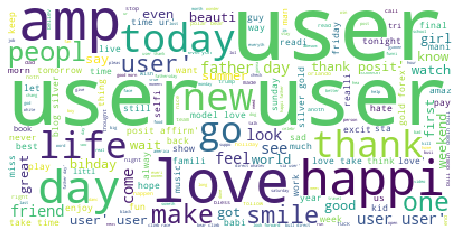

In [20]:
mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

On applying tfidf the accuracy we got for different models are Naive bayes - 80.8%, LR (grid - 96%), rf - 96.4%, KNN - 94.6%, ann - 95.9%, 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here

# max_df = 0.50 means "It ignores terms that appear in more than 50% of the documents".min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
# min_df = 5 means "ignore terms that appear in less than 5 documents".

tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words = {'english'},ngram_range=(1, 2),min_df=5, max_df = 0.3)
 
# just send in all your docs here
X_tf = tfidf_vectorizer.fit_transform(corpus)
y = dataset.iloc[:, 1].values

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer 
TfidfVectorizer?

In [8]:
X_tf.shape, y.shape

((31962, 8844), (31962,))

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf.toarray(), y, test_size = 0.25, random_state = 0, stratify = y)

In [26]:
train_test_split?

on applying normal split method the model was generating poor precision and recall for negative category, so
applying stratified data split technique and shuffling the data to reduce the chance of overfitting.

### Creating count vectorizer separately (naive - 89.8%, 

In [35]:
# # Creating the Bag of Words model
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range=(1,3),max_features= 20000, stop_words= 'english' )
# cv.fit(corpus)
# X = cv.transform(corpus).toarray()
# y = dataset.iloc[:, 1].values

In [36]:
# # save countvectorizer model as pikel file 
# joblib.dump(cv, 'cv.pkl') 

In [12]:
# Load the matrix from the file 
cv = joblib.load('cv.pkl') 

In [14]:
X_cv = cv.transform(corpus).toarray()
y_cv = dataset.iloc[:, 1].values

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xcv_train, Xcv_test, ycv_train, ycv_test = train_test_split(X_cv, y_cv, test_size = 0.25, random_state = 0)

### Naive Bayes (93%-same)

In [19]:
# Fitting Naive Bayes to the Training set(95%, 92% us)
from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(Xcv_train, ycv_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
# Fitting Naive Bayes to the Training set with stratified 
from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
classifier_naive?

In [10]:
# Predicting the Test set results
y_pred_naive = classifier_naive.predict(X_test)

In [15]:
# Predicting the train set results
y_pred_naive_train = classifier_naive.predict(X_train)

In [12]:
X_test.shape

(7991, 8844)

In [11]:
# stratified + tfidf + naive(test)
from sklearn.metrics import accuracy_score 
naive_tfidf_test_accuracy=accuracy_score(y_test, y_pred_naive)

In [12]:
print(naive_tfidf_test_accuracy)

0.8597171818295583


In [22]:
# tfidf +naive(train)
from sklearn.metrics import accuracy_score 
naive_tfidf_test_accuracy=accuracy_score(y_test, y_pred_naive)
naive_tfidf_train_accuracy=accuracy_score(y_pred_naive_train, y_train)
print(naive_tfidf_train_accuracy)

0.8897000542321972


In [17]:
# tfidf(stratified) + naive (test) classificaion score 
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred_naive, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.87      0.92      7430
    positive       0.29      0.69      0.41       561

    accuracy                           0.86      7991
   macro avg       0.63      0.78      0.66      7991
weighted avg       0.93      0.86      0.88      7991



In [20]:
# Model Evaluation metrics (tfidf+test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_naive_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_naive_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_naive_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_naive_test)))

NameError: name 'y_pred_naive_test' is not defined

In [21]:
ycv_pred_train = classifier_naive.predict(Xcv_train)

In [22]:
# CV+naive(test)
from sklearn.metrics import accuracy_score 
accuracy_score(ycv_test, ycv_pred)

0.8987611062445251

In [23]:
# CV+naive(train)
from sklearn.metrics import accuracy_score 
accuracy_score(ycv_pred_train, ycv_train)

0.9303742021609445

In [24]:
# cv + naive (test) classificaion score 
target_names = ['negative', 'positive']
print(classification_report(ycv_test, ycv_pred, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.92      0.94      7460
    positive       0.35      0.60      0.44       531

    accuracy                           0.90      7991
   macro avg       0.66      0.76      0.69      7991
weighted avg       0.93      0.90      0.91      7991



on applying naive bayes model the best accuracy we obtained is 93% which was same for tf-idf method and count
vectoriser method.

### Logistic Regression (96.4 - cv, 96.15- tfidf)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_train.shape

(23971, 8844)

applying grid search to get the optimal parameter for our model to get the best accuracy below i have applied grid
search for both count-vectorizer matrix and tf-idf matrix.

In [27]:
#Grid Search (cv)
from sklearn.model_selection import GridSearchCV
clf_grid = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc_cv = GridSearchCV(clf_grid, param_grid = grid_values, cv)
grid_clf_acc_cv.fit(Xcv_train, ycv_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
#Grid Search(tfidf)
from sklearn.model_selection import GridSearchCV
clf_grid_new = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc_new = GridSearchCV(clf_grid_new, param_grid = grid_values, cv = 10)
grid_clf_acc_new.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

applying grid search for stratified data to compare the result with other methods

In [74]:
#Grid Search(tfidf + stratified)
from sklearn.model_selection import GridSearchCV
clf_grid_new = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc_new = GridSearchCV(clf_grid_new, param_grid = grid_values, cv = 10)
grid_clf_acc_new.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
y_pred_logistic_test = grid_clf_acc_new.predict(X_test)

In [28]:
y_pred_logistic_train = grid_clf_acc_new.predict(X_train)

In [89]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
y_pred_train = grid_clf_acc_a.predict(X_train)

In [29]:
# New Model Evaluation metrics for train data (tfidf + stratified)
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_logistic_train)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_logistic_train)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_logistic_train)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_logistic_train)))

Accuracy Score : 0.9849818530724626
Precision Score : 0.9824689554419284
Recall Score : 0.800118976799524
F1 Score : 0.881967213114754


In [27]:
# New Model Evaluation metrics for test data (tfidf + stratified)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_logistic_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_logistic_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_logistic_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_logistic_test)))

Accuracy Score : 0.9635840320360406
Precision Score : 0.8479381443298969
Recall Score : 0.5864527629233511
F1 Score : 0.6933614330874605


In [36]:
logistic_tfidf_test_accuracy = accuracy_score(y_test,y_pred_new)

In [43]:
plt.scatter?

on applying stratified sampling we can see that the precision, recall and accuracy of minority class is further decreased


In [28]:
# save cv + logistic regression model as pikel file 
joblib.dump(grid_clf_acc_cv, 'tweet_Grid_clf_cv.pkl') 

['tweet_Grid_clf_cv.pkl']

In [115]:
grid_clf_acc_new?

In [ ]:
# # Load the model from the file 
# grid_clf_acc_cv = joblib.load('tweet_Grid_clf_cv.pkl') 

In [112]:
y_pred_new = grid_clf_acc_new.predict(X_test)

In [113]:
# New Model Evaluation metrics for test data (tfidf + cross valid)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_new)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_new)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_new)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_new)))

Accuracy Score : 0.9615817795019397
Precision Score : 0.8146067415730337
Recall Score : 0.5461393596986818
F1 Score : 0.6538895152198422


 below is the result on applying count-vectorizer

In [30]:
#Predict values for (count vectoriser + logistic regression)
y_pred_lr_cv = grid_clf_acc_cv.predict(Xcv_test)

In [31]:
y_pred_train_lr_cv = grid_clf_acc_cv.predict(Xcv_train)

In [33]:
# New Model Evaluation metrics for test data (cv + lr)
print('Accuracy Score : ' + str(accuracy_score(ycv_test,y_pred_lr_cv)))
print('Precision Score : ' + str(precision_score(ycv_test,y_pred_lr_cv)))
print('Recall Score : ' + str(recall_score(ycv_test,y_pred_lr_cv)))
print('F1 Score : ' + str(f1_score(ycv_test,y_pred_lr_cv)))

Accuracy Score : 0.9639594543861845
Precision Score : 0.8075949367088607
Recall Score : 0.60075329566855
F1 Score : 0.6889848812095032


In [34]:
# New Model Evaluation metrics for train data (cv + lr)
print('Accuracy Score : ' + str(accuracy_score(ycv_train,y_pred_train_lr_cv)))
print('Precision Score : ' + str(precision_score(ycv_train,y_pred_train_lr_cv)))
print('Recall Score : ' + str(recall_score(ycv_train,y_pred_train_lr_cv)))
print('F1 Score : ' + str(f1_score(ycv_train,y_pred_train_lr_cv)))

Accuracy Score : 0.9948687997997581
Precision Score : 0.99625
Recall Score : 0.9316189362945646
F1 Score : 0.962851102385986


In [78]:
#Logistic Regression (Grid Search) Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_acc)

array([[7394,   66],
       [ 241,  290]])

In [50]:
classification_report?

In [78]:
# New Model Evaluation metrics for test data (tfidf + stratified + without applying max_feature parameter in tf-idf) 
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.88      0.92      7430
    positive       0.29      0.65      0.40       561

    accuracy                           0.86      7991
   macro avg       0.63      0.76      0.66      7991
weighted avg       0.92      0.86      0.89      7991



In [ ]:
# Save the model as a pickle in a file (tfidf + 5000 feature) 
joblib.dump(grid_clf_acc, 'tweet_Grid_clf_5000.pkl') 

In [ ]:
# Save the model(tfidf + 8844 features) as a pickle in a file 
joblib.dump(grid_clf_acc, 'tweet_Grid_clf.pkl') 

In [29]:
# Load the model from the file 
grid_clf_acc_a = joblib.load('tweet_Grid_clf.pkl') 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported 

### random forest classifier (96.4 -tfidf)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
classifier_rf = RandomForestClassifier(n_estimators= 500, criterion='entropy', random_state= 0) 

In [40]:
classifier_rf_cv.fit(Xcv_train, ycv_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_pred_rf_test = classifier_rf.predict(X_test)

In [34]:
y_pred_rf_train = classifier_rf.predict(X_train)

In [35]:
# New Model Evaluation metrics testing tfidf + stratified
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf_test)))

Accuracy Score : 0.9644600175197097
Precision Score : 0.9209726443768997
Recall Score : 0.5401069518716578
F1 Score : 0.6808988764044945


In [36]:
# New Model Evaluation metrics for training data tfidf + stratified
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_rf_train)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_rf_train)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_rf_train)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_rf_train)))

Accuracy Score : 0.9996245463268115
Precision Score : 1.0
Recall Score : 0.9946460440214159
F1 Score : 0.9973158365642709


In [41]:
# Save the countvectoriser model as a pickle in a file 
joblib.dump(classifier_rf_cv, 'tweet_rf_cv.pkl') 

['tweet_rf_cv.pkl']

In [42]:
# # Load the cv_model from the file 
# classifier_rf_cv = joblib.load('tweet_rf_cv.pkl')  

In [40]:
# # Save the model as a pickle in a file 
# joblib.dump(classifier_rf, 'tweet_rf.pkl') 

['tweet_rf.pkl']

In [109]:
# # Load the model from the file 
# classifier_rf = joblib.load('tweet_rf.pkl')  

In [43]:
y_pred_cv = classifier_rf_cv.predict(Xcv_test)

In [44]:
y_pred_train_cv =  classifier_rf_cv.predict(Xcv_train)

In [45]:
# New Model Evaluation metrics for training data of countvectoriser
print('Accuracy Score : ' + str(accuracy_score(ycv_train,y_pred_train_cv)))
print('Precision Score : ' + str(precision_score(ycv_train,y_pred_train_cv)))
print('Recall Score : ' + str(recall_score(ycv_train,y_pred_train_cv)))
print('F1 Score : ' + str(f1_score(ycv_train,y_pred_train_cv)))

Accuracy Score : 0.9997496975512077
Precision Score : 1.0
Recall Score : 0.9964932787843367
F1 Score : 0.9982435597189696


In [47]:
# New Model Evaluation metrics testing countvectoriser data 
print('Accuracy Score : ' + str(accuracy_score(ycv_test,y_pred_cv)))
print('Precision Score : ' + str(precision_score(ycv_test,y_pred_cv)))
print('Recall Score : ' + str(recall_score(ycv_test,y_pred_cv)))
print('F1 Score : ' + str(f1_score(ycv_test,y_pred_cv)))

Accuracy Score : 0.961706920285321
Precision Score : 0.8504672897196262
Recall Score : 0.5141242937853108
F1 Score : 0.6408450704225352


In [111]:
# New Model Evaluation metrics training tfidf data
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_train)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_train)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.9996662634016102
Precision Score : 1.0
Recall Score : 0.6045197740112994
F1 Score : 0.4424534803583735


In [49]:
#model evaluation for testing countvectoriser data
target_names = ['negative', 'positive']
print(classification_report(ycv_test, y_pred_cv, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.99      0.98      7460
    positive       0.85      0.51      0.64       531

    accuracy                           0.96      7991
   macro avg       0.91      0.75      0.81      7991
weighted avg       0.96      0.96      0.96      7991



In [39]:
# New Model Evaluation metrics tfidf test data 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.9640845951695658
Precision Score : 0.8935483870967742
Recall Score : 0.5216572504708098
F1 Score : 0.6587395957193818


In [40]:
#model evaluation for testing tfidf data
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      7460
    positive       0.89      0.52      0.66       531

    accuracy                           0.96      7991
   macro avg       0.93      0.76      0.82      7991
weighted avg       0.96      0.96      0.96      7991



### KNN (tfidf - 94.6)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
classifier_knn_cv = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
classifier_knn_cv.fit(Xcv_train, ycv_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

By choosing n_neighbour=5 we will find 5 nearest neighbours and assign the point to the category with more near 
points

In [53]:
# Save the model(knn+countvectoriser) as a pickle in a file 
joblib.dump(classifier_knn_cv, 'tweet_knn_cv.pkl') 

['tweet_knn_cv.pkl']

In [54]:
# Load the model from the file 
classifier_knn_cv = joblib.load('tweet_knn_cv.pkl')  

In [17]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
# Save the tfidf model as a pickle in a file 
joblib.dump(classifier_knn, 'tweet_knn.pkl') 

['tweet_knn.pkl']

In [63]:
# Load the model from the file 
classifier_knn = joblib.load('tweet_knn.pkl')  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kd_tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.dist_metrics module is  deprecated in version 0.22 

In [19]:
y_pred = classifier_knn.predict(X_test)

In [25]:
y_pred_train = classifier_knn.predict(X_train)

as the prediction of knn takes a lot of time so we are saving the prediction.

In [27]:
#y_pred = classifier_knn.predict(Xcv_test)

In [57]:
# Save the prediction of test set as a pickle in a file 
joblib.dump(y_pred_cv, 'y_pred_cv_knn.pkl') 

['y_pred_cv_knn.pkl']

In [58]:
# Save the prediction of training set as a pickle in a file 
joblib.dump(y_pred_train_cv, 'y_pred_train_cv_knn.pkl') 

['y_pred_train_cv_knn.pkl']

In [60]:
# New Model Evaluation metrics (training + countvectorizer)
print('Accuracy Score : ' + str(accuracy_score(ycv_train,y_pred_train_cv)))
print('Precision Score : ' + str(precision_score(ycv_train,y_pred_train_cv)))
print('Recall Score : ' + str(recall_score(ycv_train,y_pred_train_cv)))
print('F1 Score : ' + str(f1_score(ycv_train,y_pred_train_cv)))

Accuracy Score : 0.9450586124900922
Precision Score : 0.9828431372549019
Recall Score : 0.23436586791350086
F1 Score : 0.3784804152902312


In [61]:
# New Model Evaluation metrics (test + countvectorizer)
print('Accuracy Score : ' + str(accuracy_score(ycv_test,y_pred_cv)))
print('Precision Score : ' + str(precision_score(ycv_test,y_pred_cv)))
print('Recall Score : ' + str(recall_score(ycv_test,y_pred_cv)))
print('F1 Score : ' + str(f1_score(ycv_test,y_pred_cv)))

Accuracy Score : 0.9438117882617946
Precision Score : 0.9880952380952381
Recall Score : 0.15630885122410546
F1 Score : 0.26991869918699185


In [21]:
# Save the predicition of testing set of tfidf as a pickle in a file 
joblib.dump(y_pred, 'y_pred_test_knn.pkl') 

['y_pred_test_knn.pkl']

In [47]:
# Load the predicition of testing set of tfidf as a pickle in a file 
y_pred = joblib.load('y_pred_test_knn.pkl')  

In [22]:
# Save the predicition of training set of tfidf as a pickle in a file 
joblib.dump(y_pred_train, 'y_pred_train_knn.pkl') 

['y_pred_train_knn.pkl']

In [23]:
# Load the predicition of training set of tfidf as a pickle in a file 
y_pred_train = joblib.load('y_pred_train_knn.pkl') 

In [28]:
# New Model Evaluation metrics (tfidf + train set)
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_train)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_train)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_train)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_train)))

Accuracy Score : 0.9308748070585291
Precision Score : 0.8
Recall Score : 0.01903628792385485
F1 Score : 0.03718768158047647


In [31]:
# New Model Evaluation metrics(tfidf + test set) 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_knn)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_knn)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_knn)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_knn)))

Accuracy Score : 0.946064322362658
Precision Score : 0.9716981132075472
Recall Score : 0.19397363465160075
F1 Score : 0.32339089481946626


In [48]:
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred_knn, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97      7460
    positive       0.97      0.19      0.32       531

    accuracy                           0.95      7991
   macro avg       0.96      0.60      0.65      7991
weighted avg       0.95      0.95      0.93      7991



## fitting deep learning (tfidf + without max_feature - 95.94%)

In [14]:
import tensorflow as tf
import keras 
import time 
from keras.models import Sequential #(used to initialise the nural network)
from keras.layers import Dense #(used to create the layers in ANN)

Using TensorFlow backend.


In [15]:
print(tf.version.VERSION)

2.0.0


In [16]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds #contains tokeniser 

In [17]:
# Initialising the ANN
classifier = Sequential()

In [18]:
#adding the input and first hidden layer
classifier.add(Dense(output_dim = 2500, init = 'uniform', activation = 'relu', input_dim = 8844 ))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8844, units=2500, kernel_initializer="uniform")`
  


In [19]:
#adding second hidden layer (init is for weights)(relu is for rectifier function)
classifier.add(Dense(output_dim = 1250, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 625, init = 'uniform', activation = 'relu'))
#adding the output layer ()
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1250, kernel_initializer="uniform")`
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=625, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


In [20]:
#compiling the ANN
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
y_train.shape

(23971,)

In [22]:
X_train.shape

(23971, 8844)

In [23]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2500)              22112500  
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_3 (Dense)              (None, 625)               781875    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 626       
Total params: 26,021,251
Trainable params: 26,021,251
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Fitting the ANN to the training set 
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
23971/23971 [==============================] - 1019s 42ms/step - loss: 0.1496 - accuracy: 0.9507
Epoch 2/5
23971/23971 [==============================] - 1020s 43ms/step - loss: 0.0590 - accuracy: 0.9799
Epoch 3/5
23971/23971 [==============================] - 9162s 382ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 4/5
23971/23971 [==============================] - 1009s 42ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 5/5
23971/23971 [==============================] - 1919s 80ms/step - loss: 0.0032 - accuracy: 0.9990


In [82]:
#Fitting the ANN to the training set of countvectoriser  
classifier.fit(Xcv_train, ycv_train, batch_size = 10, nb_epoch = 5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
23971/23971 [==============================] - 1808s 75ms/step - loss: 0.1528 - accuracy: 0.9542
Epoch 2/5
23971/23971 [==============================] - 2145s 89ms/step - loss: 0.0404 - accuracy: 0.9867
Epoch 3/5
23971/23971 [==============================] - 2243s 94ms/step - loss: 0.0115 - accuracy: 0.9967
Epoch 4/5
23971/23971 [==============================] - 1715s 72ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 5/5
23971/23971 [==============================] - 1696s 71ms/step - loss: 0.0040 - accuracy: 0.9990


In [25]:
y_pred = classifier.predict(X_test)

In [26]:
y_train_pred = classifier.predict(X_train)

In [29]:
y_pred = (y_pred > 0.5)

In [30]:
y_train_pred = (y_train_pred > 0.5)

In [31]:
# accuracy test + tfidf
accuracy_score(y_pred, y_test)

0.9594543861844576

In [32]:
# accuracy train + tfidf
accuracy_score(y_train_pred, y_train)

0.999415960952818

In [83]:
y_pred_cv = classifier.predict(Xcv_test)

In [84]:
y_train_pred_cv = classifier.predict(Xcv_train)

In [85]:
# Save the model (cv+ANN) as a pickle in a file
joblib.dump(classifier, 'tweet_classifier_cv_ANN.pkl') 

['tweet_classifier_cv_ANN.pkl']

In [86]:
# Load the model from the file(cv+ANN) 
tweet_classifier_cv_ANN = joblib.load('tweet_classifier_cv_ANN.pkl')  

In [87]:
# Save y_pred (cv+ANN) as a pickle in a file
joblib.dump(y_pred_cv, 'tweet_ypred_cv_ANN.pkl') 

['tweet_ypred_cv_ANN.pkl']

In [34]:
# Load the model from the file(cv+ANN) 
y_pred_cv = joblib.load('tweet_ypred_cv_ANN.pkl')  

In [88]:
# Save y_train (cv+ANN) as a pickle in a file
joblib.dump(y_train_pred_cv, 'tweet_ytrainpred_cv_ANN.pkl') 

['tweet_ytrainpred_cv_ANN.pkl']

In [35]:
# # Save the model as a pickle in a file(with 5000 features) 
# joblib.dump(classifier, 'tweet_classifier_ANN.pkl') 

['tweet_classifier_ANN.pkl']

In [36]:
# Load the model from the file(cv+ANN) 
y_train_pred_cv = joblib.load('tweet_ytrainpred_cv_ANN.pkl')  

In [32]:
tweet_classifier_ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2500)              22112500  
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_3 (Dense)              (None, 625)               781875    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 626       
Total params: 26,021,251
Trainable params: 26,021,251
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_pred_cv = (y_pred_cv > 0.5)
y_train_pred_cv =(y_train_pred_cv>.5)

In [91]:
# cv test data prediction result 
target_names = ['negative', 'positive']
print(classification_report(ycv_test, y_pred_cv, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.98      0.98      7460
    positive       0.72      0.63      0.67       531

    accuracy                           0.96      7991
   macro avg       0.85      0.80      0.82      7991
weighted avg       0.96      0.96      0.96      7991



In [92]:
# New Model Evaluation metrics (test + cv)
print('Accuracy Score : ' + str(accuracy_score(ycv_test,y_pred_cv)))
print('Precision Score : ' + str(precision_score(ycv_test,y_pred_cv)))
print('Recall Score : ' + str(recall_score(ycv_test,y_pred_cv)))
print('F1 Score : ' + str(f1_score(ycv_test,y_pred_cv)))

Accuracy Score : 0.9592041046176949
Precision Score : 0.7233115468409586
Recall Score : 0.6252354048964218
F1 Score : 0.6707070707070707


In [95]:
# cv train data prediction result 
target_names = ['negative', 'positive']
print(classification_report(ycv_train, y_train_pred_cv, target_names= target_names))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     22260
    positive       1.00      0.98      0.99      1711

    accuracy                           1.00     23971
   macro avg       1.00      0.99      0.99     23971
weighted avg       1.00      1.00      1.00     23971



In [94]:
# New Model Evaluation metrics (train + cv)
print('Accuracy Score : ' + str(accuracy_score(ycv_train,y_train_pred_cv)))
print('Precision Score : ' + str(precision_score(ycv_train,y_train_pred_cv)))
print('Recall Score : ' + str(recall_score(ycv_train,y_train_pred_cv)))
print('F1 Score : ' + str(f1_score(ycv_train,y_train_pred_cv)))

Accuracy Score : 0.9985816194568436
Precision Score : 0.9952746603662138
Recall Score : 0.9848042080654588
F1 Score : 0.9900117508813161


In [88]:
# Load the model from the file(with 5000 features) 
tweet_classifier_ANN = joblib.load('tweet_classifier_ANN.pkl')  

In [89]:
y_pred = tweet_classifier_ANN.predict(X_test) # here X_test has 8844 features 

In [90]:
y_pred = (y_pred > 0.5)

In [46]:
tweet_classifier_ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2500)              22112500  
_________________________________________________________________
dense_2 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_3 (Dense)              (None, 625)               781875    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 626       
Total params: 26,021,251
Trainable params: 26,021,251
Non-trainable params: 0
_________________________________________________________________


In [91]:
# accuracy with 5000 features (95.69%)
accuracy_score(y_pred, y_test)

0.9594543861844576

In [92]:
target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

    negative       0.97      0.98      0.98      7460
    positive       0.74      0.61      0.67       531

    accuracy                           0.96      7991
   macro avg       0.85      0.80      0.82      7991
weighted avg       0.96      0.96      0.96      7991



### Visualising the result 

In [33]:
# initialize list of lists 
data = [['Naive', 85.97, 88.97, 89.87, 93.03], ['LogisticRegression', 96.35, 98.5, 96.39, 99.48], ['RandomForest', 96.4, 99.9, 96.1, 99.9], ['ANN', 95.94, 99.9, 95.92, 99.85]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Model', 'Tf-idf(test)', 'Tf-idf(train)', 'cv(test)', 'cv(train)']) 

In [34]:
df

,Model,Tf-idf(test),Tf-idf(train),cv(test),cv(train)
0,Naive,85.97,88.97,89.87,93.03
1,LogisticRegression,96.35,98.50,96.39,99.48
2,RandomForest,96.40,99.90,96.10,99.90
3,ANN,95.94,99.90,95.92,99.85


In [35]:
df.iloc[:,0]

0                 Naive
1    LogisticRegression
2          RandomForest
3                   ANN
Name: Model, dtype: object

### Accuracy train and test data of models using tfidf 

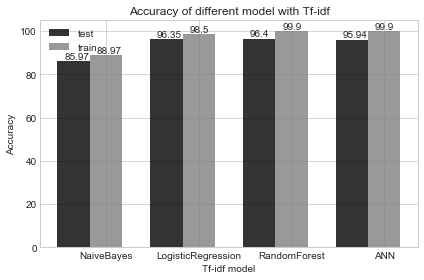

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
test = (85.97, 96.35, 96.4, 95.94)
train = (88.97, 98.5, 99.9, 99.9)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, test, bar_width,
alpha=opacity,
color='black',
label='test')

rects2 = plt.bar(index + bar_width, train, bar_width,
alpha=opacity,
color='grey',
label='train', )

plt.xlabel('Tf-idf model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different model with Tf-idf')
plt.xticks(index + bar_width, ('NaiveBayes', 'LogisticRegression', 'RandomForest', 'ANN'))
plt.legend()

for index,data in enumerate(test):
    plt.text(x=index-0.1 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

for index,data in enumerate(train):
    plt.text(x=index+0.25 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    

plt.tight_layout()
plt.show()

### Accuracy train and test data of models using CountVectorizer 

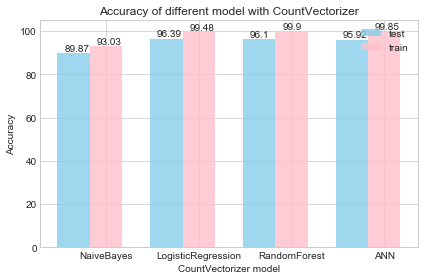

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
test = (89.87, 96.39, 96.1, 95.92)
train = (93.03, 99.48, 99.9, 99.85)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, test, bar_width,
alpha=opacity,
color='skyblue',
label='test')

rects2 = plt.bar(index + bar_width, train, bar_width,
alpha=opacity,
color= 'pink',
label='train')

plt.xlabel('CountVectorizer model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different model with CountVectorizer')
plt.xticks(index + bar_width, ('NaiveBayes', 'LogisticRegression', 'RandomForest', 'ANN'))
plt.legend()


for index,data in enumerate(test):
    plt.text(x=index-0.1 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

for index,data in enumerate(train):
    plt.text(x=index+0.25 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    
    
plt.tight_layout()
plt.show()

### Comparing test accuracy of tfidf and cv model

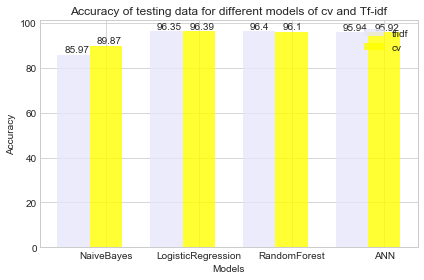

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
tfidf= (85.97, 96.35, 96.4, 95.94)
cv = (89.87, 96.39, 96.1, 95.92 )

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tfidf, bar_width,
alpha=opacity,
color='lavender',
label='tfidf')

rects2 = plt.bar(index + bar_width, cv, bar_width,
alpha=opacity,
color= 'yellow',
label='cv')


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of testing data for different models of cv and Tf-idf')
plt.xticks(index + bar_width, ('NaiveBayes', 'LogisticRegression', 'RandomForest', 'ANN'))
plt.legend()


for index,data in enumerate(tfidf):
    plt.text(x=index-0.1 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

for index,data in enumerate(cv):
    plt.text(x=index+0.25 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    
    
plt.tight_layout()
plt.show()

#### Testing data 

In [28]:
test_dataset = pd.read_csv("test_tweet.csv")

In [29]:
test_dataset.head(3)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...


In [30]:
test_dataset.shape

(17197, 2)

In [31]:
# # Cleaning the texts
# import re
# import nltk
# #nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus_t = []
# for i in range(0, test_dataset.shape[0]):
#     tweet = re.sub('[^a-zA-Z]', ' ', dataset['tweet'][i])
#     tweet = tweet.lower()
#     tweet = tweet.split()
#     ps = PorterStemmer()
#     tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
#     tweet = ' '.join(tweet)
#     corpus_t.append(tweet)

In [32]:
# #save the corpus
# np.save('tweet_test_cleaned_corpus.npy', corpus_t)

In [33]:
#load the corpus
corpus_t= np.load('tweet_test_cleaned_corpus.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

In [34]:
X_tf_final = tfidf_vectorizer.transform(corpus_t)

In [38]:
X_tf_final.shape

(17197, 8844)

In [36]:
X_final = X_tf_final.toarray()

In [41]:
#Predict values usi lr(8844)
y_final_lr = grid_clf_acc_a.predict(X_tf_final)

In [39]:
y_final_rf = grid_clf_acc.predict(X_final)

NameError: name 'grid_clf_acc' is not defined

In [36]:
y_final

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# Save the model as a pickle in a file(with 8844 features) 
joblib.dump(y_final, 'y_final_tweet.pkl') 

['y_final_tweet.pkl']

In [40]:
# Load the model from the file(with 8844 features) 
y_final = joblib.load('y_final_tweet.pkl')  

In [41]:
y_final.shape

(17197,)